In [2]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2025-03-11 15:35:08--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.06s   

2025-03-11 15:35:08 (18.9 MB/s) - ‘input.txt’ saved [1115394/1115394]



## Transformer arhitechture
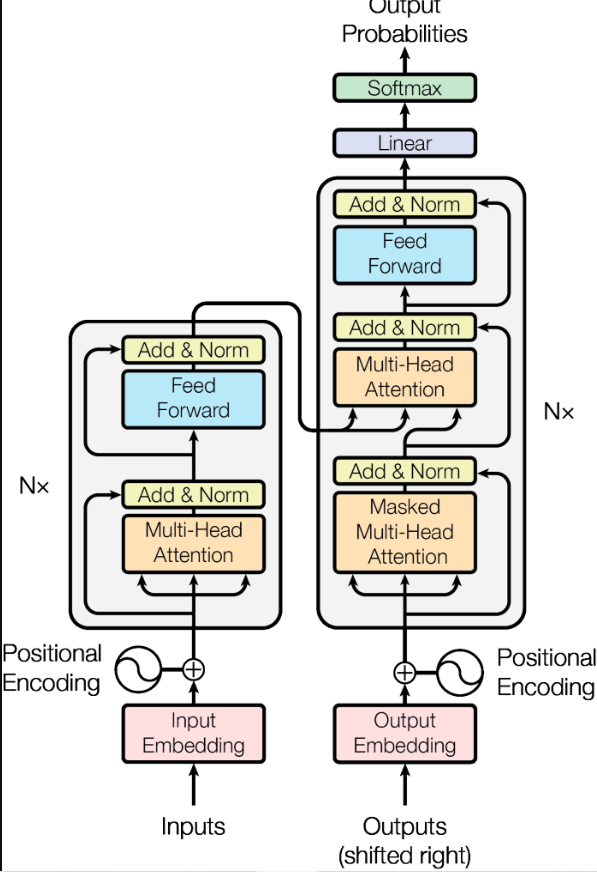

In [2]:
# read it in to inspect it
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [3]:
print("length of dataset in characters: ", len(text))

length of dataset in characters:  1115394


In [4]:
# let's look at the first 1000 characters
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [5]:
# all unique charachter in a text is the vocab of a text
# set gives unique char, sorted list of unique char
# len of that is vocab_size
chars= sorted(list(set(text)))
vocab_size= len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [6]:

# simple encoder/decoder logic
# create a mapping from characters to integers
# iterate over all the char and map it to integers
stoi = { ch:i for i,ch in enumerate(chars) }
# iterate over all the  integer and map it to char
itos = { i:ch for i,ch in enumerate(chars) }
# function that takes a string and makes it to integer
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
# function that takes a string and makes it to character
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

print(encode("hii there")) # encoding a text we recieve a lsit of integers that represents the string
print(decode(encode("hii there")))# decoder: take a list of integers, output a string

[46, 47, 47, 1, 58, 46, 43, 56, 43]
hii there


In [9]:
!python -m pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.3 MB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 KB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.4/128.4 KB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 KB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.1/146.1 KB 29.3 MB/s eta 0:00:00
You should consider upgrading via the '/home/rit/neural_net_karpathy/.venv/bin/python -m pip install --upgrade pip' command.


In [7]:
# openai uses tiktoken to do this 
# read from here https://github.com/openai/tiktoken
# example usage
import tiktoken
enc= tiktoken.get_encoding('gpt2')
# tiktoken has 50257 tokens between 0 to 50257
enc.n_vocab

50257

In [8]:
enc.encode("hii there")

[71, 4178, 612]

In [9]:
enc.decode([71, 4178, 612])

'hii there'

In [10]:
# here we are using character level tokenizer as mentioned above
# it encodes and decodes each charachter so we get long sequenc of integers


In [11]:
# let's now encode the entire text dataset and store it into a torch.Tensor
import torch # we use PyTorch: https://pytorch.org
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000]) # the 1000 characters we looked at earier will to the GPT look like this

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
      

In [12]:
# Let's now split up the data into train and validation sets
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [13]:
# we genrally dont give entire data to train the transformer we use chunks from the data
# the max chunk length is reffered here as block_size
block_size= 8
# first 9 charachters in training set
# we predict at every charachter level
# eg in context of 18 --> 47 comes next , in context of 18,47 --> 57 comes next and so on
train_data[:block_size+1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [14]:
#explanation of next charachter or target to be predicted
x = train_data[:block_size] # inputs, 1st block size char
y = train_data[1:block_size+1] # next block size char as target
for t in range(block_size):
    context = x[:t+1] # all the char in x upto t including t
    target = y[t] # always the target t in list of targets y
    print(f"when input is {context} the target: {target}")

when input is tensor([18]) the target: 47
when input is tensor([18, 47]) the target: 56
when input is tensor([18, 47, 56]) the target: 57
when input is tensor([18, 47, 56, 57]) the target: 58
when input is tensor([18, 47, 56, 57, 58]) the target: 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target: 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target: 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target: 58


In [15]:
# while training we will have many batches of multiple chuncks or blocks of text
# so we can keep all gpu utilized
# so we use batch_size as well 
# seed will allow us to randomly locate the chunks from the text
# we can randomize the seed but for now we make it maual so that we see same no 
# for vedio ref
torch.manual_seed(1337)
batch_size = 4 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    # if split is train the we see the train data or val data
    data = train_data if split == 'train' else val_data
    #ix is 4 numbers randomly generated as batch size is 4 ,ix is bw 0 and len(data)- block_size
    ix = torch.randint(len(data) - block_size, (batch_size,))
    # firt block_size chr starting at i <-- geting chunks for blocksize
    # x is 4*8 tensor  and each row of x is chunk of training set
    x = torch.stack([data[i:i+block_size] for i in ix])
    # offset by 1 of x
    # each associated targets of x is stored in y
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('----')

for b in range(batch_size): # batch dimension
    for t in range(block_size): # time dimension
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")


inputs:
torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
targets:
torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])
----
when input is [24] the target: 43
when input is [24, 43] the target: 58
when input is [24, 43, 58] the target: 5
when input is [24, 43, 58, 5] the target: 57
when input is [24, 43, 58, 5, 57] the target: 1
when input is [24, 43, 58, 5, 57, 1] the target: 46
when input is [24, 43, 58, 5, 57, 1, 46] the target: 43
when input is [24, 43, 58, 5, 57, 1, 46, 43] the target: 39
when input is [44] the target: 53
when input is [44, 53] the target: 56
when input is [44, 53, 56] the target: 1
when input is [44, 53, 56, 1] the target: 58
when input is [44, 53, 56, 1, 58] the target: 46
when input is [44, 53

In [16]:
print(xb) # our input to the transformer

tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])


#### here if we see the crossentropy of pytorch , we know that inputs are accepted as (minibatch,C) which is 2d thus 
#### we reshape the logits from b,t,c to 2d where min batch is b*t and c is channels (vocab_size)
#### check https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
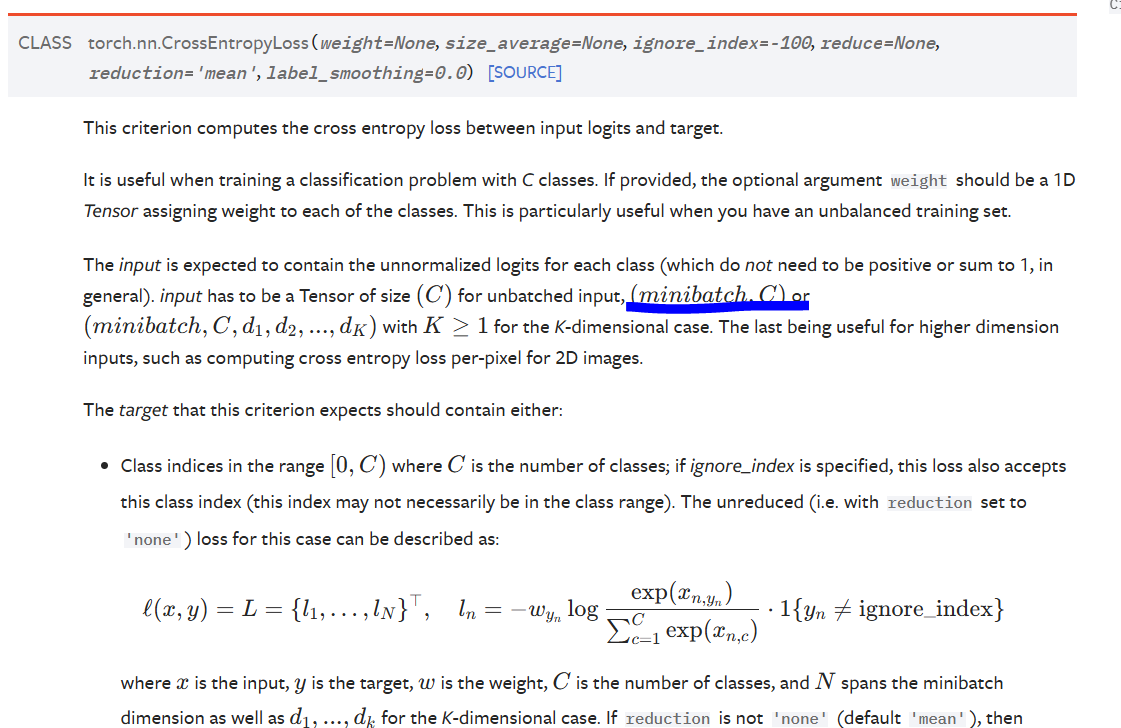

In [17]:
# simple neural network bigram language model
# bigram language model is done in makemore lectures
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):

        # idx and targets are both (B,T) tensor of integers
        #every single integer in nput will refer to token embedding table craeted in __init__
        #and i will pluck ot a row of that embedding table coresponding to the index
        # tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        # [44, 53, 56,  1, 58, 46, 39, 58],
        # [52, 58,  1, 58, 46, 39, 58,  1],
        # [25, 17, 27, 10,  0, 21,  1, 54]])
        # 24 will pluck 24th row of embedding table so on
        # pytorch arranges this into batch, time, channel (vocab_size)--> 4,8,65
        # this (b,t,c) is logits the score of next char in the sequence
        logits = self.token_embedding_table(idx) # (B,T,C)

        # if their is no target we dont have loss as loss is b/w target and predicted
        # target might be none for 1st iteration by default
        if targets is None:
            loss = None
        else:
            # check above why this re arrange ments is done for logits
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            # same is done for targets
            targets = targets.view(B*T)
            # negetive likelihood loss or cross entropy of how well we predict the nxt char 
            # using logits and targets
            loss = F.cross_entropy(logits, targets)

        return logits, loss
    
    # the job of generate is to take b, t and generate (b,t+1), (b,t+2) .... so on
    # it will do that untill max new tokens
    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the predictions from logits
            logits, loss = self(idx)
            # focus only on the last time step
            # we focus on list element in time demension so that we can predict what comes next
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            # idx_next b, 1 as in each batch dimension their is single prediction 
            # of what comes next
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(logits.shape)
print(loss)
# 0 is new line char so first we feed 0 as index and ask to 
# generate the rest upto max tokens, 
# as generate function returns batches of idx 
# so we get the 1st idx as 0 position  and convert it 
# into a list as we have seen before decode function takes a list of integers and gives 
# next predicted characters
idx = torch.zeros((1, 1), dtype=torch.long)
print(decode(m.generate(idx, max_new_tokens=100)[0].tolist()))



torch.Size([32, 65])
tensor(4.8786, grad_fn=<NllLossBackward0>)

Sr?qP-QWktXoL&jLDJgOLVz'RIoDqHdhsV&vLLxatjscMpwLERSPyao.qfzs$Ys$zF-w,;eEkzxjgCKFChs!iWW.ObzDnxA Ms$3


In [18]:
# now some garbage is being generated as model is not trained
# so we need to train the model

# create a PyTorch optimizer
# optimizer-- takes the gradients and updates the parameters using gradients 
# as done in leacture 1 about gradients in micrograd lecture
# m is our model onto which optimizer is applied
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [19]:
# Training
batch_size = 32 # increase this for better utilization of gpu
for steps in range(15000): # increase number of steps for good results...

    # sample a batch of data
    # as we defined get_batch before to get batch of train data
    xb, yb = get_batch('train')

    # evaluate the loss and increase steps untill loss is less 10000
    # m is our model as stored above
    logits, loss = m(xb, yb)
    # updates gradients starting at 0 gard
    optimizer.zero_grad(set_to_none=True)
    # backpropogation
    loss.backward()
    # again update gradients do this entirely for 10000
    optimizer.step()

print(loss.item())

2.364027976989746


In [20]:
idx = torch.zeros((1, 1), dtype=torch.long)
print(decode(m.generate(idx, max_new_tokens=500)[0].tolist()))


ly,
TEY ishwarod, se ttha's; I ppry memitth we ieeelo me,
Faitindoog se tt afre ce tim wary stuklel d lofran VID g
OLI'tof areris nde imowlmandise wineatingiomanh y Mave,
NCHegr.
Trs y thaurymeresththonglast ffomofo, thiles's Ble t ireowor-mito shigee mer
Wank
Myo I t Wh wiakn I ad y, LICophouplefarouk iru hore y u be ge, tor sor my tiuenor,
Y:

YCaind TRICI outhep thelapovenombus, dour lla!


PHave'soucemienecos ch RI tederowre,

Fats menshe ndite helles l que mesad a imy he hir y in

QUCotount


In [21]:
# now in the above bigram model the tokens do not know the context just knows itself n next prediction so its perpormance is poor
# now we use transformers so that context is well understood for better performance
# now will first take this code into a .py file to make it more exceutble an add few more details their

## Mathematical trick in self attention

In [22]:
# consider the following toy example:

torch.manual_seed(1337)
B,T,C = 4,8,2 # batch, time, channels
x = torch.randn(B,T,C)
x.shape

torch.Size([4, 8, 2])

In [23]:
# We want x[b,t] = mean_{i<=t} x[b,i]
# we use bag of words -- words stored in these 8 locations and we r averaging them
xbow = torch.zeros((B,T,C)) # starting at 0
for b in range(B): # iterating over batches
    for t in range(T): # iterating over time
        #prev token are at batch dimention b upto including t token
        # we get how many t dimention in the past in chanel C --(t,c)
        xprev = x[b,:t+1] # (t,C)
        xbow[b,t] = torch.mean(xprev, 0) # taking avg of all of these in bag of words


In [24]:
# 0th batch element
x[0]

tensor([[ 0.1808, -0.0700],
        [-0.3596, -0.9152],
        [ 0.6258,  0.0255],
        [ 0.9545,  0.0643],
        [ 0.3612,  1.1679],
        [-1.3499, -0.5102],
        [ 0.2360, -0.2398],
        [-0.9211,  1.5433]])

In [25]:
# bow of the batch 0
# 1st row same
# 2nd row avg of 1st n 2nd row f x[0]
# 3rd row avg of 1st,2nd , 3rd row of x[0] so on
xbow[0]

tensor([[ 0.1808, -0.0700],
        [-0.0894, -0.4926],
        [ 0.1490, -0.3199],
        [ 0.3504, -0.2238],
        [ 0.3525,  0.0545],
        [ 0.0688, -0.0396],
        [ 0.0927, -0.0682],
        [-0.0341,  0.1332]])

In [26]:
# Trick to do above calcualttion efficiantly using matrix multipliation
# self attention trick
# toy example illustrating how matrix multiplication can be used for a "weighted aggregation"
torch.manual_seed(42)
# 3* 3 one-matrix
a = torch.tril(torch.ones(3, 3))
# exctly like matrix mul we can do this expression to take cumulative avg sum on a
# which was done and then do matrix mul to get final output
a = a / torch.sum(a, 1, keepdim=True)
# random matrix 3*2
b = torch.randint(0,10,(3,2)).float()
# (3*3)X(3*2) matrix
c = a @ b
print('a=')
print(a)
print('--')
print('b=')
print(b)
print('--')
print('c=')
print(c)

a=
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
--
b=
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
--
c=
tensor([[2.0000, 7.0000],
        [4.0000, 5.5000],
        [4.6667, 5.3333]])


In [27]:
# consider the following toy example:

torch.manual_seed(1337)
B,T,C = 4,8,2 # batch, time, channels
x = torch.randn(B,T,C)
x.shape

torch.Size([4, 8, 2])

In [28]:
# We want x[b,t] = mean_{i<=t} x[b,i]
xbow = torch.zeros((B,T,C))
for b in range(B):
    for t in range(T):
        xprev = x[b,:t+1] # (t,C)
        xbow[b,t] = torch.mean(xprev, 0)


In [29]:
# version 2: using matrix multiply for a weighted aggregation

# torch.cumsum(x, dim=1) performs a direct summation row-wise.
# The division / torch.arange(1, T+1) is exact, as the denominator is explicitly defined.
# This ensures no floating-point division errors.

# Here, wei / torch.sum(wei, 1, keepdim=True) is susceptible to floating-point inaccuracies.
# The sum of each row in wei should be exactly 1, but due to floating-point rounding, it might be slightly off (e.g., 0.99999994 instead of 1.0).
# This tiny error propagates across torch.bmm(), causing xbow2 to slightly deviate from xbow.
xbow2 = torch.cumsum(x, dim=1) / torch.arange(1, T+1, dtype=torch.float32).view(1, T, 1)  # (B, T, T) @ (B, T, C) ----> (B, T, C)

torch.allclose(xbow, xbow2)

True

In [30]:
xbow[0] , xbow2[0]

(tensor([[ 0.1808, -0.0700],
         [-0.0894, -0.4926],
         [ 0.1490, -0.3199],
         [ 0.3504, -0.2238],
         [ 0.3525,  0.0545],
         [ 0.0688, -0.0396],
         [ 0.0927, -0.0682],
         [-0.0341,  0.1332]]),
 tensor([[ 0.1808, -0.0700],
         [-0.0894, -0.4926],
         [ 0.1490, -0.3199],
         [ 0.3504, -0.2238],
         [ 0.3525,  0.0545],
         [ 0.0688, -0.0396],
         [ 0.0927, -0.0682],
         [-0.0341,  0.1332]]))

In [ ]:
# version 3: we will use this in self attention
# weights begin with 0
# it tells us how much tokens frm the past can be aggregated
import torch.nn.functional as F
tril = torch.tril(torch.ones(T, T))

# Construct `wei` so that Softmax reproduces cumulative mean
# some token here wei will be moe related to other tokens
wei = torch.zeros((T,T))  # Create row-wise increasing weights
# tokens from the past cannot communicate
wei = wei.masked_fill(tril == 0, float('-inf'))  # Mask upper triangular part
wei = F.softmax(wei, dim=-1)  # Apply Softmax with scaling for better control

# Expand and compute weighted sum
xbow3 = wei @ x
torch.allclose(xbow, xbow3,atol=1e-6) # their might be tiny differences in decimal

True

## Self Attention Vs Multi head attention
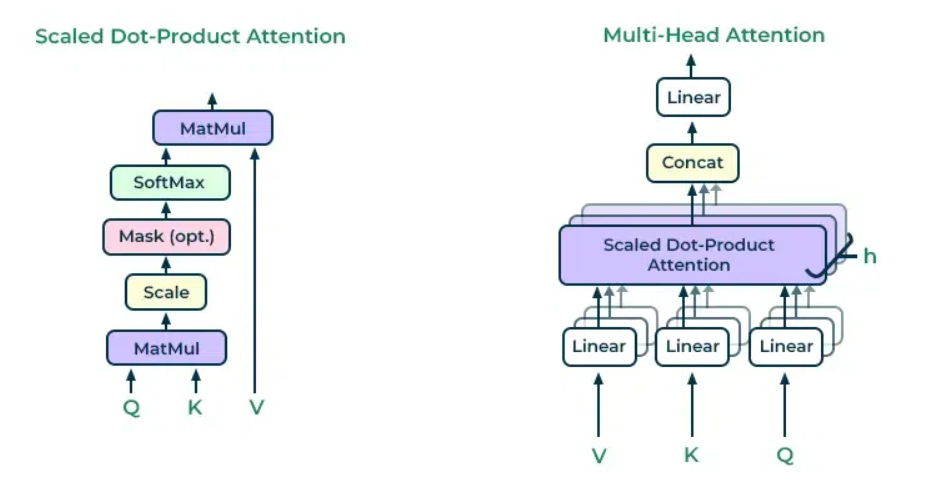

In [35]:
# so far we were starting with 0 tensor wei 
# but we cant hav a uniform 0 tensor for tokens at start point
# as its important for each token to find every other token reletively interesting
# so to gather this reletive info frm the past in  a data dependent way we use
# self attention
# Self attention works:
# evry single node / token will contain the following
# - 2 vectors querry , key
# -- querry--- what am i looking for?
# -- key --- what do i contain?
# - to get affinity of these tokens or reletive info we do a dot product b/w keys and querry
# for each token . (querry.key)

# if key and querry i self aligned they will interact vey high amount and get to learn more
# about that specific token a supposed to any other token in the sequence.

In [ ]:
# version 4: self-attention!
torch.manual_seed(1337)
B,T,C = 4,8,32 # batch, time, channels
x = torch.randn(B,T,C)

# let's see a single Head perform self-attention
head_size = 16
# linear modules with bais = false so that they apply matrix multiplication well
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)
k = key(x)   # (B, T, 16) --- key
q = query(x) # (B, T, 16) --- querry
# for proper dimensio matrix multiplication we do q.k(transpose)
# we just transpose the last  2 dimesions that is T, 16 as batch demesion remains same
wei =  q @ k.transpose(-2, -1) # (B, T, 16) @ (B, 16, T) ---> (B, T, T)
# then we run same trick using softmax
tril = torch.tril(torch.ones(T, T))
#wei = torch.zeros((T,T))
# we use the maskng so that -inf ones which has less info are not allowed to ommunicate
# ewhich is arranged in upper trangualar part
# if im on 5th node or token i will communicte or find relevent info in 
# 1, 2, 3, 4 , 5 node and not commuicate with 6, 7, 8 nodes whcih are future tokens
# so my predicton will happen on past tokens not future hence we mask it with -inf
wei = wei.masked_fill(tril == 0, float('-inf'))
# when tokens have high affinity through softmax we can end up aggregating a lot 
# of these information into that tokens position
# also softmax will make -inf to 0 so that it doesnt effect the weights
# softmax tells how much of info to aggregate from tokens from past for current prediction
wei = F.softmax(wei, dim=-1)

# we calcualte the value of x using value which is a linear module
# then we  get output by dot product of weights and v
# v will tell entire purpose of x with ts embedding and that gets aggregated finally with weights
v = value(x)
out = wei @ v
#out = wei @ x

out.shape

torch.Size([4, 8, 16])

Notes:
- Attention is a **communication mechanism**. Can be seen as nodes in a directed graph looking at each other and aggregating information with a weighted sum from all nodes that point to them, with data-dependent weights.
- There is no notion of space. Attention simply acts over a set of vectors. This is why we need to positionally encode tokens.
- Each example across batch dimension is of course processed completely independently and never "talk" to each other. This block here is called a "decoder" attention block because it has triangular masking, and is usually used in autoregressive settings, like language modeling.
- In an "encoder" attention block just delete the single line that does masking with `tril`, allowing all tokens to communicate.
- "self-attention" just means that the keys and values are produced from the same source as queries. In "cross-attention", the queries still get produced from x, but the keys and values come from some other, external source (e.g. an encoder module)
- "Scaled" attention additional divides `wei` by 1/sqrt(head_size). This makes it so when input Q,K are unit variance, wei will be unit variance too and Softmax will stay diffuse and not saturate too much. Illustration below

In [ ]:
# if k, q are unit gaussian
k = torch.randn(B,T,head_size)
q = torch.randn(B,T,head_size)
# this id not unit gaussian hence softmax wont be preserved so we do *head_size**-0.5
# to preserve its unit property as its feeded into softmax its imp that wei is fairly diffuse
wei = q @ k.transpose(-2, -1) * head_size**-0.5

In [ ]:
# k unit gaussian
k.var()

tensor(1.0449)

In [ ]:
# q unit gaussian
q.var()

tensor(1.0700)

In [ ]:
# this also turns to be unit gaussian
wei.var()

tensor(1.0918)

In [43]:
torch.softmax(torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5]), dim=-1)

tensor([0.1925, 0.1426, 0.2351, 0.1426, 0.2872])

In [ ]:
torch.softmax(torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5])*8, dim=-1) # gets too peaky, converges to one-hot
# it sharpens towars watever no is highest in previous output hnce softmax will be too peeky
# hence we use the aboe sqrt scaling to control the variance at initialization. 

tensor([0.0326, 0.0030, 0.1615, 0.0030, 0.8000])

In [ ]:
# now we will mplement the self attention or scaled dot product attention in the .py code
# and we see loss reduced to train loss 2.3838, val loss 2.4043 ad the ouput also improved
# Whent iknt,
# Thowf,
# This sowr K

# Hiset bobe dienavegr-'ts mealilanss:
# Want he uw hat vet?
# Wed las ate awice my.

# HDET:
# ANGo oup
# Yowns, tof is heing mil ndill, aes iree sen cin lat Het drovets, and Win ng:
# Wilerans!
# el lind peal.
# -hul qouchiry ptugr aiss hiw ye wllinde norfopeeelaves
# Mom.

# Whod mothake on,-
# No ourt piiby we ati dourive wees ired thoo mowr-fore
# To kad ntert the son; igrh! m:
# EN CI inle ont ffaf Pre?

# Whiom.
# WHe-
# LIERLA,
# Sby ake adsal this ghe thinicons kasar tey Iry ts I fr th vely

## Multi head attention
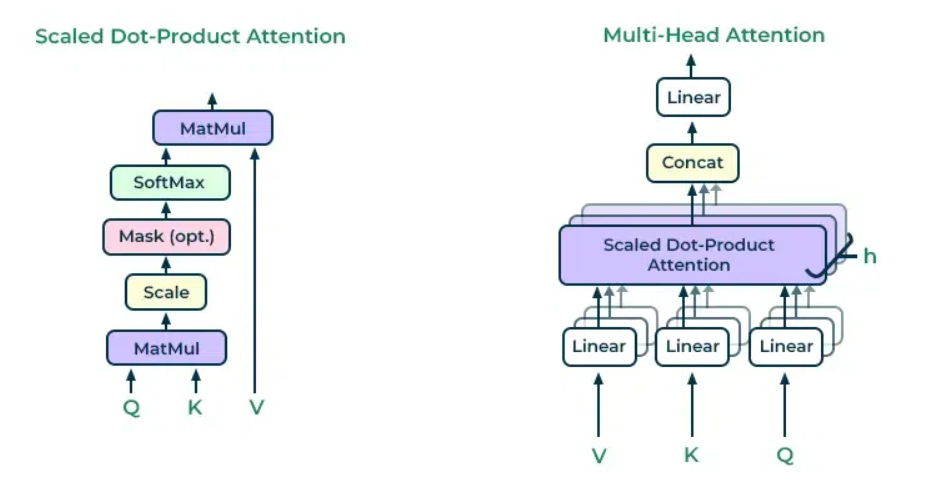

In [ ]:
# Multi head attention is multiple heads of self attention runnig in parallel as shown in diagram
# implemented that in .py code